* SERIES 200 THUẬT TOÁN AI VÀ DEMO CỦA CHÚNG.

I. Machine Learning Algorithms

7. Naive Bayes

- Mô tả: Phân loại dữ liệu dựa trên xác suất.
- Demo: Dự đoán cảm xúc dựa trên văn bản.

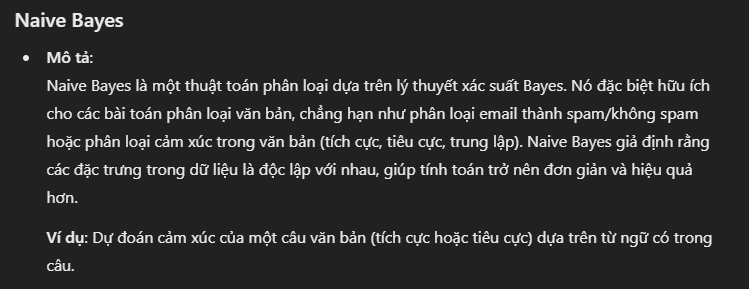

Độ chính xác: 0.00%
Ma trận nhầm lẫn:
 [[0 2]
 [1 0]]
Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



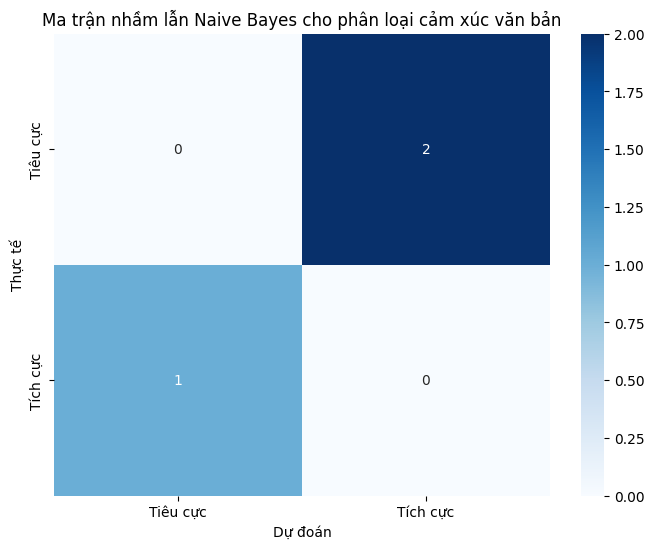

In [1]:
from sklearn.model_selection import train_test_split # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.feature_extraction.text import CountVectorizer # Chuyển đổi văn bản thành vector từ (Bag of Words)
from sklearn.naive_bayes import MultinomialNB # Mô hình Naive Bayes
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Hàm đánh giá mô hình
import seaborn as sns # Thư viện vẽ đồ thị   
import matplotlib.pyplot as plt # Thư viện vẽ đồ thị

# Dữ liệu văn bản và nhãn cảm xúc (tích cực = 1, tiêu cực = 0)
texts = [ # Ví dụ về các câu văn bản cần phân loại cảm xúc
    "I love this product", "This is the best movie ever", "Absolutely fantastic experience", 
    "I am very disappointed", "This was the worst decision", "Terrible and horrible",
    "Such a great experience", "I would highly recommend this", "Horrible experience", 
    "Worst product I have ever used"
]
labels = [1, 1, 1, 0, 0, 0, 1, 1, 0, 0]  # Nhãn tương ứng: 1 = Tích cực, 0 = Tiêu cực

# Chuyển đổi văn bản thành vector từ (Bag of Words)
vectorizer = CountVectorizer() # Khởi tạo vectorizer từ (Bag of Words)
X = vectorizer.fit_transform(texts) # Chuyển đổi văn bản thành vector từ

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42) 

# Khởi tạo và huấn luyện mô hình Naive Bayes
nb_model = MultinomialNB() # Khởi tạo mô hình Naive Bayes
nb_model.fit(X_train, y_train) # Huấn luyện mô hình

# Dự đoán trên tập kiểm tra
y_pred = nb_model.predict(X_test) # Dự đoán nhãn cảm xúc

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred) # Độ chính xác của mô hình
conf_matrix = confusion_matrix(y_test, y_pred) # Ma trận nhầm lẫn
class_report = classification_report(y_test, y_pred) # Báo cáo phân loại

# In ra độ chính xác, ma trận nhầm lẫn và báo cáo phân loại
print(f"Độ chính xác: {accuracy * 100:.2f}%") 
print("Ma trận nhầm lẫn:\n", conf_matrix)
print("Báo cáo phân loại:\n", class_report)

# Hiển thị ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Tiêu cực", "Tích cực"], yticklabels=["Tiêu cực", "Tích cực"])
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Ma trận nhầm lẫn Naive Bayes cho phân loại cảm xúc văn bản")
plt.show()


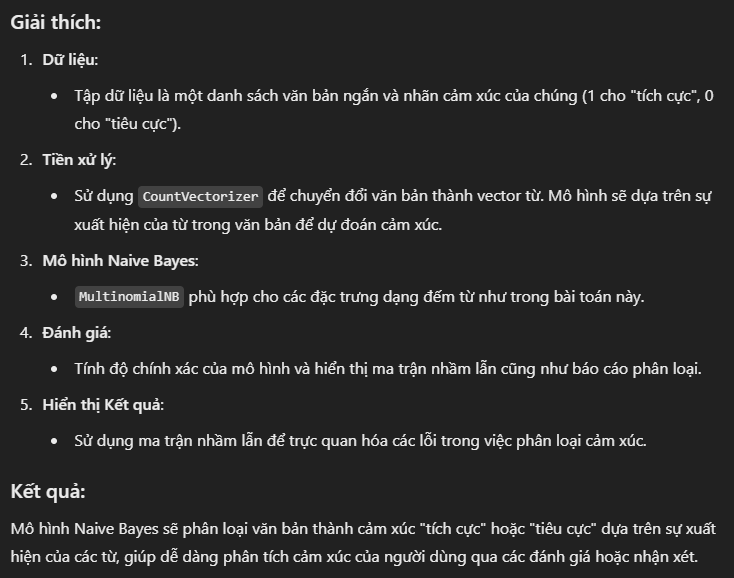